In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C://Users//Sudha//OneDrive//Documents//GitHub//Projects//Stock Price Predicition//data//ADANIPORTS.csv")
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [3]:
x = df[['Prev Close', 'Open', 'High', 'Low', 'Last', 'VWAP', 'Volume', 'Turnover', '%Deliverble']]
x[0:5]

,Prev Close,Open,High,Low,Last,VWAP,Volume,Turnover,%Deliverble
0,440.00,770.00,1050.00,770.0,959.0,984.72,27294366,2.687719e+15,0.3612
1,962.90,984.00,990.00,874.0,885.0,941.38,4581338,4.312765e+14,0.3172
2,893.90,909.00,914.75,841.0,887.0,888.09,5124121,4.550658e+14,0.2088
3,884.20,890.00,958.00,890.0,929.0,929.17,4609762,4.283257e+14,0.2735
4,921.55,939.75,995.00,922.0,980.0,965.65,2977470,2.875200e+14,0.2741


In [4]:
print(df.dtypes)

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume      int64
%Deliverble           float64
dtype: object


In [5]:
y = df[['Close']]
y[0:5]

,Close
0,962.90
1,893.90
2,884.20
3,921.55
4,969.30


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
x = np.asarray(x)
x[0:5]

array([[4.40000000e+02, 7.70000000e+02, 1.05000000e+03, 7.70000000e+02,
        9.59000000e+02, 9.84720000e+02, 2.72943660e+07, 2.68771905e+15,
        3.61200000e-01],
       [9.62900000e+02, 9.84000000e+02, 9.90000000e+02, 8.74000000e+02,
        8.85000000e+02, 9.41380000e+02, 4.58133800e+06, 4.31276530e+14,
        3.17200000e-01],
       [8.93900000e+02, 9.09000000e+02, 9.14750000e+02, 8.41000000e+02,
        8.87000000e+02, 8.88090000e+02, 5.12412100e+06, 4.55065846e+14,
        2.08800000e-01],
       [8.84200000e+02, 8.90000000e+02, 9.58000000e+02, 8.90000000e+02,
        9.29000000e+02, 9.29170000e+02, 4.60976200e+06, 4.28325663e+14,
        2.73500000e-01],
       [9.21550000e+02, 9.39750000e+02, 9.95000000e+02, 9.22000000e+02,
        9.80000000e+02, 9.65650000e+02, 2.97747000e+06, 2.87519974e+14,
        2.74100000e-01]])

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [9]:
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [10]:
y_predict = LR.predict(x_test)

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
print("Mean sq. error in the model for predicted and the actual value is: ",mean_squared_error(y_test,y_predict))

Mean sq. error in the model for predicted and the actual value is:  1.6813827109981425


In [13]:
print("Predicted value",LR.predict(x_test[:10]))
print('\n')
print("actual value",y_test[:])

Predicted value [[581.35079044]
 [511.58594719]
 [137.03021165]
 [594.15897402]
 [370.96790341]
 [139.34327595]
 [117.50657073]
 [296.79176863]
 [375.1833366 ]
 [371.91888603]]


actual value        Close
163   584.60
3249  511.25
1247  137.05
71    601.15
2890  371.10
...      ...
1258  136.40
89    593.40
2322  319.35
1745  274.50
1571  178.80

[997 rows x 1 columns]


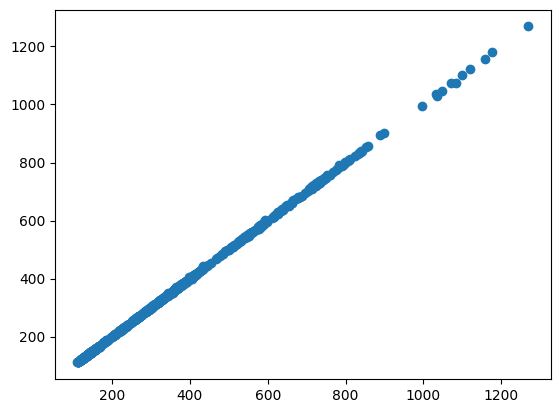

In [14]:
# plt.plot(y_predict,y_test)
plt.scatter(y_predict,y_test)
plt.show()